# INF 2179 Assignment 1
### Dataset: SiriLog
#### Name: Zijie Li

In [265]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore

pd.set_option('display.float_format',lambda x : '%.2f' % x) # Scientific counting is prohibited

#### 1. Loading: Load the data into a data structure (e.g., pandas, or numpy array/matrix).

In [15]:
# Choose pandas method 
df = pd.read_csv('SiriLog.csv')

# print the first 6 line of this dataframe
df.head(6)

,Time,LineID,JourneyPattern,VehicleJID,Operator,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
0,1411686000,65B,065B1001,7251,RD,0,-6.266066,53.338269,-739,38004,1354,0
1,1411686000,13,00131002,1809,HN,0,-6.266332,53.408386,1127,33342,323,0
2,1411686000,7,00070004,4235,D1,0,-6.130316,53.254202,-420,44016,3219,0
3,1411686000,25,025B0001,5757,CD,0,-6.446961,53.344495,143,33608,3370,0
4,1411686001,27,077A0001,2602,RD,0,-6.341833,53.289558,45,33520,2596,0
5,1411686001,13,00131005,1874,CD,0,-6.314403,53.340444,101,33190,1992,0


In [17]:
# Check the missing value
df.isnull().any()

Time              False
LineID            False
JourneyPattern    False
VehicleJID        False
Operator          False
Congestion        False
Lon               False
Lat               False
Delay             False
VehicleID         False
StopID            False
AtStop            False
dtype: bool

#### 2. Analyzing: Which of the predictors are numeric and which are nominal (or categorical)?

In [12]:
# Use .dtypes to show the type of each columns
df.dtypes

Time                int64
LineID             object
JourneyPattern     object
VehicleJID          int64
Operator           object
Congestion          int64
Lon               float64
Lat               float64
Delay               int64
VehicleID           int64
StopID              int64
AtStop              int64
dtype: object

This result is able to show the data type of each column in this dataframe, but it is different from what we get according to the data description and their meaning in the real world, especially for indicator variables.

Numeric: *Time*, *Lon*, *Lat*, *Delay*.

Categorical: *LineID*, *JourneyPattern*, *VehicleJID*, *Operator*, *Congestion*, *VehicleID*, *StopID*, *AtStop*.

In [19]:
# Modify the column types
df[['VehicleJID', 'Congestion', 'VehicleID', 'StopID', 'AtStop']] = df[['VehicleJID', 'Congestion', 'VehicleID', 'StopID', 'AtStop']].astype(object)

# Recheck the type
df.dtypes

Time                int64
LineID             object
JourneyPattern     object
VehicleJID         object
Operator           object
Congestion         object
Lon               float64
Lat               float64
Delay               int64
VehicleID          object
StopID             object
AtStop             object
dtype: object

#### 3. Exploring: What is the range of each numeric attribute? What is the mean and standard deviation of each numeric predictor?

In [26]:
df.describe()

,Time,Lon,Lat,Delay
count,1048575.00,1048575.00,1048575.00,1048575.00
mean,1411732540.83,-6.27,53.34,151.36
std,13976.23,0.08,0.05,620.02
min,1411686000.00,-6.61,53.07,-14209.00
25%,1411719863.00,-6.30,53.32,-59.00
50%,1411732721.00,-6.26,53.35,64.00
75%,1411745369.00,-6.23,53.37,295.00
max,1411755520.00,-6.05,53.61,11723.00


The table decribes the basic statistical informantion for each numeric column.
The range of *Time* is from 1411686000 to 1411755520.
The range of *Lon* is from -6.61 to -6.05.
The range of *Lat* is from 53.07 to 53.61.
The range of *Delay* is from 14209.00 to 11723.00.

Since this dataset is expected to predict the travelling times of bus, *Lon* and *Lat* are treated as predictor. Thus, the mean and sd of *Lon* is -6.27 and 0.08 respectively, while the mean and sd value of *Lat* is 53.34 and 0.05 respectively.

#### 4. Manipulating: Remove rows 1000 through 8500. What is the range, mean, standard deviation of each numeric feature in the remaining dataset? Choose one of the operators. Present the mean delay for that operator.

In [118]:
# Copy the original dataframe
df1 = df
# Remove rows by index
df1.drop(df.index[999 : 8500])

,Time,LineID,JourneyPattern,VehicleJID,Operator,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
0,1411686000,65B,065B1001,7251,RD,0,-6.27,53.34,-739,38004,1354,0
1,1411686000,13,00131002,1809,HN,0,-6.27,53.41,1127,33342,323,0
2,1411686000,7,00070004,4235,D1,0,-6.13,53.25,-420,44016,3219,0
3,1411686000,25,025B0001,5757,CD,0,-6.45,53.34,143,33608,3370,0
4,1411686001,27,077A0001,2602,RD,0,-6.34,53.29,45,33520,2596,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1411755514,747,07471001,1944,SL,0,-6.24,53.43,213,40043,3665,1
1048571,1411755514,25,025B0001,404,PO,0,-6.45,53.34,-466,33371,7231,0
1048572,1411755515,39,039A0001,6323,PO,0,-6.41,53.40,449,33439,1874,0
1048573,1411755520,7,00081002,4142,D1,0,-6.24,53.34,91,44017,490,0


In [116]:
df1.describe()

,Time,Lon,Lat,Delay
count,1048575.00,1048575.00,1048575.00,1048575.00
mean,1411732540.83,-6.27,53.34,151.36
std,13976.23,0.08,0.05,620.02
min,1411686000.00,-6.61,53.07,-14209.00
25%,1411719863.00,-6.30,53.32,-59.00
50%,1411732721.00,-6.26,53.35,64.00
75%,1411745369.00,-6.23,53.37,295.00
max,1411755520.00,-6.05,53.61,11723.00


The above table decsribe the statistic information for numeric attributes after the specified remove being removed.

In [117]:
# Choose the opeartor 'HN'.
df2 = df1.loc[df1['Operator'] == 'HN']

# Calculate the mean delay value for selected opeartor
df2['Delay'].mean()

120.93603115078942

The min *Delay* for operator HN is 120.94.

#### 5. Plotting: Plot the delay distribution per operator. You should have K histograms with K being the number of operators. What can we learn from this graph?

In [133]:
# The dataframe used in this question is already remove the rows 1000 through 8500.
# Get the list of unique value of Operator
operator_lst = df1['Operator'].unique().tolist()

In [136]:
# Create a dictionary to store the dataframe by unique value in attribute Operater
dict1 = {}
for i in range(len(operator_lst)):
    dict1[operator_lst[i]] = df1.loc[df1['Operator'] == operator_lst[i]].reset_index()['Delay']

In [137]:
# Convert the dictionary into dataframe for the convience of plotting
my_df = pd.DataFrame.from_dict(dict1, orient = 'columns')

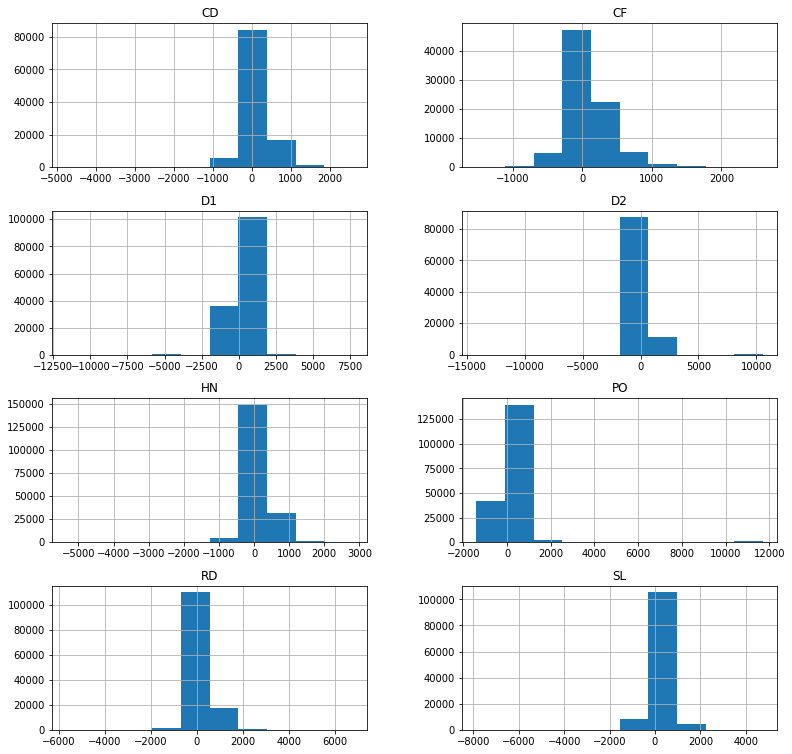

In [369]:
my_df.hist(layout = (4,2), figsize = (13,13));

In [358]:
# Check the skew for each historgram
my_df.skew()

RD    2.77
HN    0.39
D1   -7.03
CD    1.28
PO    9.41
SL   -2.70
CF    1.20
D2    7.35
dtype: float64

The histograms show the distribution of the delay time by operator. The distribution of opeartor HN (skewness = 0.39) is close to normal distribution. 

The distribution of opeartor RD, CD, PO, CF, D2 is right-skewed, while D1, SL's distribution are left-skewed.

When it comes to more realistical aspect, operators CD, SL, HN, RD, D2 are more likely to be on time since they keep their delay time within 2000s mostly. The operators CF, PO and D1 have higher probability to be late. 

As a passenger, I will choose to take the vehicle whose operators have a lower probability of being late. At the same time, the public transport management company or government may consider to adjust the arrangement strategy to improve the efficient of each operator. For example, for those stops with large passenger flow, they can consider to add new short-distance lines to ease the pressure. In addition, they can also re-plan the vehicle's route to avoid congested road sections.

#### 6. Wrangling: We aim at predicting journey durations based on various trip characteristics. Create a dataset, where every row is a  single journey, while the columns summarize all relevant journey information that would be useful to predict traveling times. Make sure that one of the columns is the total journey time.

*VehicleJID* is used to indentify each journey.
 
In each individal journey, the record in original dataset share the same *LineID*, *JoureyPattern*, *Opeartor* and *VehicleID*.
 
The journey durations denoted as *Jdurantion* can be calculated by the Time.
 
The *Congestion* and *AtStop* can generate the new attribute *Congestion_times* and *Stop_times*. The *Congestion_times* and *Stop_times* can be treated as the degree of congestion and stop. 
At first, I considered to use calculate the total stop time and congestion time for each journey, but it turns out that the system records the information for each journey around 20s each time, which means that it is difficult to speculate on the operation situation within recording interval. Unless we take StopID into consideration, and two adjacent records with *AtStop* = 1 and same *StopID* indicate that vehicle stops at that stop during the recording interval. However, it is still impossible for us to calculate the accurate congestion time, since vehicle may face several traffic jams between two stops. To sum up, I choose to add up the number of records to indicate the degree of traffic jams or parking simplely.
 
The *aver_Delay* can be derived from the attribute *Delay*.
 
The journey distance represented as *Jdistance* can be calculated by *Lon* and *Lat*.

The attribute *StopID* was not taken into consideration.

In [126]:
# The dataframe used in this question is the original one.
# Get the list of unique value of Operator
VJID_lst = df['VehicleJID'].unique().tolist()
len(VJID_lst)

5970

There will be 5970 rows in the new dataset and each row is a single journey.

In [148]:
# Create a dictionary to store the dataframe by unique value in attribute Journey
dict2 = {}
for i in range(len(VJID_lst)):
    dict2[VJID_lst[i]] = df1.loc[df['VehicleJID'] == VJID_lst[i]].reset_index()

In [154]:
# Take one pair (key = 7251) in dict2 as an example
dict2[7251]

,index,Time,LineID,JourneyPattern,VehicleJID,Operator,Congestion,Lon,Lat,Delay,VehicleID,StopID,AtStop
0,0,1411686000,65B,065B1001,7251,RD,0,-6.27,53.34,-739,38004,1354,0
1,113,1411686020,65B,065B1001,7251,RD,0,-6.27,53.34,-769,38004,1355,0
2,215,1411686040,65B,065B1001,7251,RD,0,-6.27,53.34,-769,38004,1357,0
3,329,1411686061,65B,065B1001,7251,RD,0,-6.27,53.34,-769,38004,1357,0
4,433,1411686081,65B,065B1001,7251,RD,0,-6.26,53.34,-800,38004,1357,0
5,534,1411686101,65B,065B1001,7251,RD,0,-6.26,53.34,-800,38004,1358,0
6,629,1411686120,65B,065B1001,7251,RD,0,-6.26,53.34,-800,38004,1358,0
7,724,1411686140,65B,065B1001,7251,RD,0,-6.26,53.34,-770,38004,1358,0
8,824,1411686161,65B,065B1001,7251,RD,0,-6.26,53.34,-750,38004,1358,0
9,928,1411686180,65B,065B1001,7251,RD,0,-6.26,53.34,-730,38004,1358,0


In [363]:
# Define two functions, the first one is used to calculate the distacne accorrding to longtitude 
# and latitude.
def lon_lat_dist(lon1, lat1, lon2, lat2): # All decimal
    """
    Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine euqation
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # The average radius of the earth in kilometers
    return c * r * 1000

# The second one is used to generate the new dictionary
def df_operation (df) -> dict:
    """
    This function generate the record for each journey in dict according to the detail described above.
    """
    output_dict = {}
    output_dict['VehicleJID'] = df['VehicleJID'][0]
    output_dict['Jduration'] = max(df['Time']) - min(df['Time'])
    output_dict['LineID'] = df['LineID'][0]
    output_dict['JourneyPattern'] = df['JourneyPattern'][0]
    output_dict['Operator'] = df['Operator'][0]
    output_dict['Congestion_times'] = sum(df['Congestion'])
    output_dict['aver_Delay'] = df['Delay'].mean()
    output_dict['VehicleID'] = df['VehicleID'][0]
    output_dict['Stop_times'] = sum(df['AtStop'])
    nrow = df.shape[0] # the number of columns
    distance = 0
    for i in range(nrow - 1):
        distance += lon_lat_dist(df['Lon'][i], df['Lat'][i], df['Lon'][i+1], df['Lat'][i+1])
    output_dict['Jdistance'] = round(distance, 2)
    return output_dict

In [197]:
# Create a new dictionary after we use function on each values in the previous dictionary
new_dict = {} # initial a new dict
for key, values in dict2.items():
    new_dict[key] = df_operation(values)

In [285]:
# Convert the dictionary into dataframe as new dataset
new_df = pd.DataFrame.from_dict(new_dict, orient = 'index').reset_index().drop(columns = ['index'])
new_df

,VehicleJID,Jduration,LineID,JourneyPattern,Operator,Congestion_times,aver_Delay,VehicleID,Stop_times,Jdistance
0,7251,612,65B,065B1001,RD,0,-740.84,38004,2,3051.71
1,1809,176,13,00131002,HN,0,1151.80,33342,0,1064.25
2,4235,981,7,00070004,D1,0,-387.33,44016,0,11713.88
3,5757,303,25,025B0001,CD,0,157.36,33608,3,2042.48
4,2602,2121,27,077A0001,RD,0,-64.38,33520,4,17905.54
...,...,...,...,...,...,...,...,...,...,...
5965,3463,0,15,00151001,HN,0,0.00,33547,1,0.00
5966,3233,0,16,00161001,SL,0,0.00,33629,1,0.00
5967,6496,0,31,031B1003,CF,0,0.00,38014,1,0.00
5968,4206,0,7,00070004,D2,0,135.00,43004,0,0.00


There some record's Jduration and Jdistance value is 0, because they are recorded only once in the time period.

#### 7. Correlating: Plot the traveling time as function of at least 2 journey level features (e.g., average delay) to test correlation of those features with travel times. What are your main findings?

In [286]:
# Data preprocessing: delete all the rows with Jduration equal to 0.
new_df = new_df[new_df['Jduration']>0]
new_df

,VehicleJID,Jduration,LineID,JourneyPattern,Operator,Congestion_times,aver_Delay,VehicleID,Stop_times,Jdistance
0,7251,612,65B,065B1001,RD,0,-740.84,38004,2,3051.71
1,1809,176,13,00131002,HN,0,1151.80,33342,0,1064.25
2,4235,981,7,00070004,D1,0,-387.33,44016,0,11713.88
3,5757,303,25,025B0001,CD,0,157.36,33608,3,2042.48
4,2602,2121,27,077A0001,RD,0,-64.38,33520,4,17905.54
...,...,...,...,...,...,...,...,...,...,...
5948,4769,194,46A,046A0001,D2,0,113.10,36016,2,1214.83
5954,4608,142,46A,046A0001,D2,0,614.57,36001,3,428.31
5957,3323,87,4,00041001,HN,0,71.50,40032,0,403.73
5959,5808,16,38,00380001,PO,0,0.00,33568,2,1.89


In [301]:
# Check and modified the types of each columns
new_df[['VehicleJID', 'VehicleID']] = new_df[['VehicleJID', 'VehicleID']].astype(object) # modify the type of object attribute
new_df[['Jduration']] = new_df[['Jduration']].astype(float)
new_df.dtypes

VehicleJID           object
Jduration           float64
LineID               object
JourneyPattern       object
Operator             object
Congestion_times      int64
aver_Delay          float64
VehicleID            object
Stop_times            int64
Jdistance           float64
dtype: object

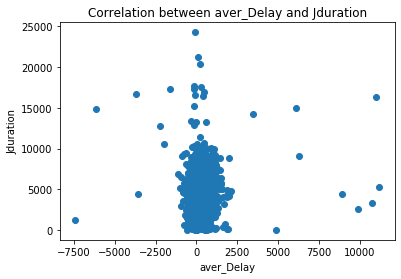

In [350]:
# plot the scatter plot to show the correlation bewteen Jduration (the duration of journey or travel times) 
# and aver_Delay (average delay).
plt.title('Correlation between aver_Delay and Jduration', fontsize = 12)
plt.xlabel("aver_Delay")
plt.ylabel("Jduration")
plt.scatter(new_df.aver_Delay, new_df.Jduration);

Combined the result of scatter plot and correlation table (in the following part), there is a slightly positive relationship (corr = 0.11) between the journey duration and average delay. 

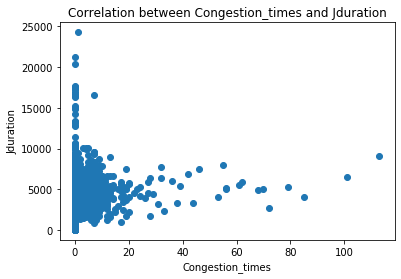

In [359]:
# plot the scatter plot to show the correlation bewteen Jduration (the duration of journey or travel times) 
# and times the vehicle faced congestion (Congestion_times).
plt.title('Correlation between Congestion_times and Jduration', fontsize = 12)
plt.xlabel("Congestion_times")
plt.ylabel("Jduration")
plt.scatter(new_df.Congestion_times, new_df.Jduration);
plt.show()

Combined the result of scatter plot and correlation table (in the following part), there is a very slightly positive relationship (corr = 0.08) between the journey duration and congestion times. 

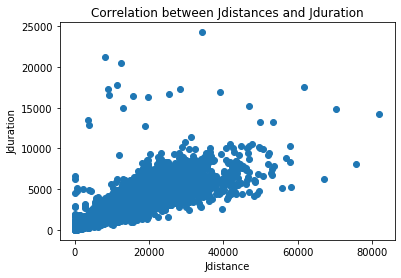

In [371]:
# plot the scatter plot to show the correlation bewteen Jduration (the duration of journey or travel times) 
# and travel distance (Jdistance).
plt.title('Correlation between Jdistances and Jduration', fontsize = 12)
plt.xlabel("Jdistance")
plt.ylabel("Jduration")
plt.scatter(new_df.Jdistance, new_df.Jduration);

Combined the result of scatter plot and correlation table (in the following part), there is a  positive relationship (corr = 0.73) between the journey duration and journey distance.

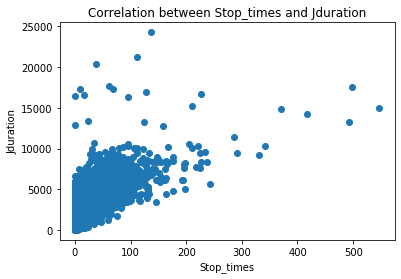

In [372]:
# plot the scatter plot to show the correlation bewteen Jduration (the duration of journey or travel times) 
# and stop times.
plt.title('Correlation between Stop_times and Jduration', fontsize = 12)
plt.xlabel("Stop_times")
plt.ylabel("Jduration")
plt.scatter(new_df.Stop_times, new_df.Jduration);

Combined the result of scatter plot and correlation table (in the following part), there is a  positive relationship (corr = 0.66) between the journey duration and stop times.

In [373]:
# Calculate the correlation between all numerical variables
new_df.corr()

,Jduration,Congestion_times,aver_Delay,Stop_times,Jdistance
Jduration,1.00,0.08,0.11,0.66,0.73
Congestion_times,0.08,1.00,0.03,-0.02,0.03
aver_Delay,0.11,0.03,1.00,0.07,0.04
Stop_times,0.66,-0.02,0.07,1.00,0.53
Jdistance,0.73,0.03,0.04,0.53,1.00


The following part focuses on the outlier of numerical attribute.
From the scatter plot, I noticed that there could exist several outliers which may influence the correlation between two attributes.

So I adopted the zscore method to remove the outliers.

In [361]:
# Zscore to remove the outlier
df = new_df[['Jduration','Congestion_times','aver_Delay','Stop_times','Jdistance']]
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df1 = df[filtered_entries]

print(new_df1)

      Jduration  Congestion_times  aver_Delay  Stop_times  Jdistance
0        612.00                 0     -740.84           2    3051.71
1        176.00                 0     1151.80           0    1064.25
2        981.00                 0     -387.33           0   11713.88
3        303.00                 0      157.36           3    2042.48
4       2121.00                 0      -64.38           4   17905.54
...         ...               ...         ...         ...        ...
5948     194.00                 0      113.10           2    1214.83
5954     142.00                 0      614.57           3     428.31
5957      87.00                 0       71.50           0     403.73
5959      16.00                 0        0.00           2       1.89
5964      56.00                 0       31.33           0     357.64

[5722 rows x 5 columns]


In [364]:
# Calculate the correlation between all numerical variables
new_df1.corr()

,Jduration,Congestion_times,aver_Delay,Stop_times,Jdistance
Jduration,1.00,0.11,0.17,0.71,0.78
Congestion_times,0.11,1.00,0.02,0.01,0.05
aver_Delay,0.17,0.02,1.00,0.14,0.08
Stop_times,0.71,0.01,0.14,1.00,0.54
Jdistance,0.78,0.05,0.08,0.54,1.00


After we checked the correlation between each attribute again, we can noticed that the correlation becomes higher than before. 